# Public Leader Board Analysis

https://www.kaggle.com/c/titanic/overview

What is the best score possible with Kaggle Titanic data set?

# Initialization

In [2]:
%run init.ipynb

In [130]:
score ={'gender_only_model':0.76555}

# Exploratory Data Analysis

In [184]:
df_raw = (pd.read_csv('../data/raw/titanic-publicleaderboard_2019-10-18.csv')
      .sort_values(by='Score')
      .reset_index(drop=True)
     )

df_raw.index = df_raw.index/df_raw.index.max()


df = (pd.concat([df_raw[~df_raw.Score.duplicated()],
                   df_raw[df_raw['TeamName'].str.contains('Kraft')]],
               )
               .sort_index()
                )
#df['Score'] = df['Score'].rolling(window=20).mean().fillna(0)
#df = df.iloc[0::10]
df['dScore'] = df['Score'].diff().fillna(0)
      
df[df['TeamName'].str.contains('Kraft')]

len(df_raw)
len(df)

df_raw[df_raw['Score'] > 0.9]

,TeamId,TeamName,SubmissionDate,Score,dScore
0.647395,3805168,BobKraft,2019-10-18 19:11:07,0.77511,0.0


25704

154

,TeamId,TeamName,SubmissionDate,Score
0.994125,262111,Vitor Alcântara Batista,2016-01-21 12:21:50,0.90430
0.994164,3013435,MeisterMorxrc,2019-04-09 07:11:06,0.90909
0.994203,3120676,wanghaoy,2019-10-04 11:54:05,0.90909
0.994242,3609521,MLPractice,2019-10-03 06:29:16,0.90909
0.994281,3679664,tiger1026,2019-10-09 21:08:26,0.90909
...,...,...,...,...
0.999844,3520050,ajiajiajiaji,2019-09-16 02:04:11,1.00000
0.999883,3709250,Sandro Wentz Forte,2019-09-26 20:15:53,1.00000
0.999922,3565130,Liang ZhuoJun,2019-09-03 11:24:58,1.00000
0.999961,1599422,Sergey Enikeev,2019-03-23 20:05:52,1.00000


### Gender Only

In [161]:
gom = df[df.Score == score['gender_only_model']]
bk_best = df[df['TeamName'].str.contains('BobKraft')]

gom
bk_best

,TeamId,TeamName,SubmissionDate,Score,dScore
0.343501,3811963,wenqin you,2019-10-18 03:29:30,0.76555,0.00479


,TeamId,TeamName,SubmissionDate,Score,dScore
0.647395,3805168,BobKraft,2019-10-18 19:11:07,0.77511,0.0


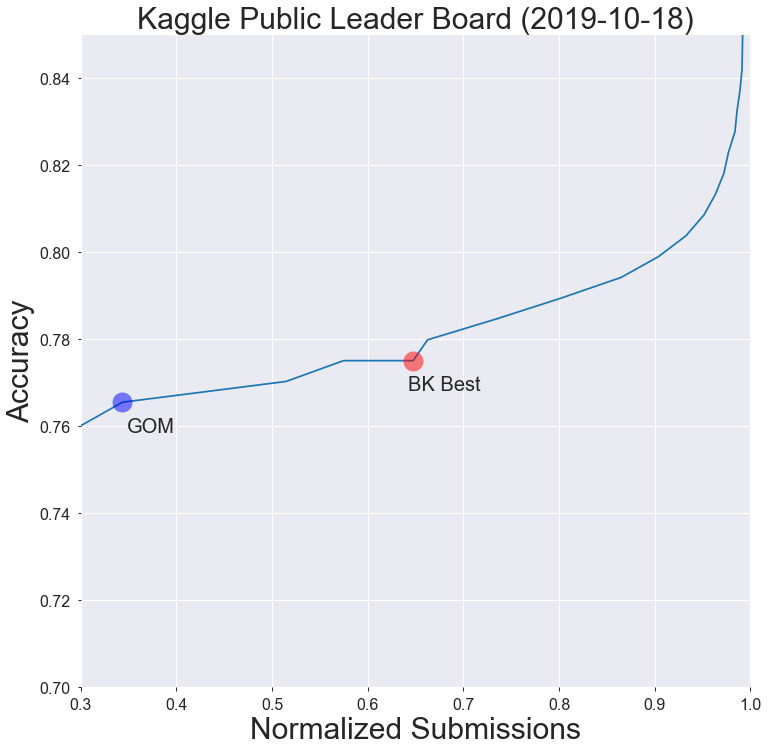

In [188]:
plt.clf()
ax1 = df.Score.plot(figsize=(12,12));
ax1.tick_params(axis="x", labelsize=16);
ax1.tick_params(axis="y", labelsize=16);

plt.xlabel('Normalized Submissions', fontsize=30);
plt.ylabel('Accuracy', fontsize=30);
plt.title('Kaggle Public Leader Board (2019-10-18)', fontsize=30)
df[df['TeamName'].str.contains('Kraft')].Score.plot(marker='o', c='red',markersize=20, alpha=0.5);
df[df.Score == score['gender_only_model']].Score.plot(marker='o', c='blue', markersize=20, alpha=0.5);

plt.text(gom.index.values+.005, gom.Score.values-.007, 'GOM', fontsize=20);
plt.text(bk_best.index.values-.005, bk_best.Score.values-.007, 'BK Best', fontsize=20);

plt.axis([0.3,1,0.7,0.85]);
plt.savefig('../docs/_images/public_leader_board.png')
plt.show();



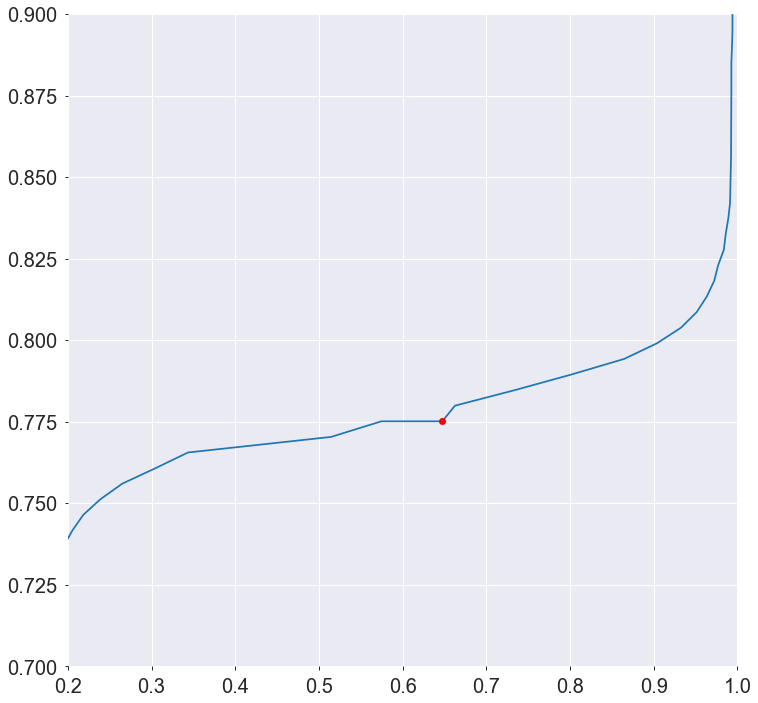

In [129]:
ax1 = df.Score.plot(figsize=(12,12))
ax1.tick_params(axis="x", labelsize=20)
ax1.tick_params(axis="y", labelsize=20)
                    
df[df['TeamName'].str.contains('Kraft')].Score.plot(marker='o', c='red');
#ax2 = plt.subplot(221)
#ax2.margins(20000, 30000)  
plt.axis([0.2,1,0.7,0.9])
plt.show();